# Burkley Weather Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Loading in and analyzing data

In [ ]:
weather = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
weather

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
weather.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [ ]:
weather.shape

(577462, 4)

In [ ]:
weather.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


## Dropping any Null Values

In [ ]:
weather = weather.dropna(how='any',axis=0)
weather.shape

(544811, 4)

In [ ]:
weather.rename(columns={'dt':'Date'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
weather.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


## Temperarily making Date the index to extract Year from the dates

In [ ]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather.set_index('Date',inplace=True)
weather.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=544811, freq=None)

In [ ]:
weather.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,
1743-11-01,4.384,2.294,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland


In [ ]:
weather.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,544811.000000
mean,17.193354,1.019190
std,10.953966,1.202634
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.207000
max,38.842000,15.003000


### Extracting Year from the Date column, now index

In [ ]:
weather['Year'] = weather.index.year
print(weather['Year'])

Date
1743-11-01    1743
1744-04-01    1744
1744-05-01    1744
1744-06-01    1744
1744-07-01    1744
              ... 
2013-04-01    2013
2013-05-01    2013
2013-06-01    2013
2013-07-01    2013
2013-08-01    2013
Name: Year, Length: 544811, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
weather

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1743-11-01,4.384,2.294,Åland,1743
1744-04-01,1.530,4.680,Åland,1744
1744-05-01,6.702,1.789,Åland,1744
1744-06-01,11.609,1.577,Åland,1744
1744-07-01,15.342,1.410,Åland,1744
...,...,...,...,...
2013-04-01,21.142,0.495,Zimbabwe,2013
2013-05-01,19.059,1.022,Zimbabwe,2013
2013-06-01,17.613,0.473,Zimbabwe,2013


## Setting my filter years to match the timespan of the other datasets

In [ ]:
filter_years = []
for i in range(53):
  filter_years.append(1960 + i)
print(filter_years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


In [ ]:
recent_weather = weather[(weather['Year'].isin(filter_years))]

In [ ]:
recent_weather

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1960-01-01,-4.380,0.430,Åland,1960
1960-02-01,-5.233,0.382,Åland,1960
1960-03-01,-2.362,0.638,Åland,1960
1960-04-01,1.922,0.450,Åland,1960
1960-05-01,8.495,0.287,Åland,1960
...,...,...,...,...
2012-08-01,18.946,1.127,Zimbabwe,2012
2012-09-01,22.609,0.643,Zimbabwe,2012
2012-10-01,23.482,0.574,Zimbabwe,2012


In [ ]:
recent_weather.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year
count,153912.000000,153912.00000,153912.000000
mean,19.039794,0.34791,1986.000000
std,10.503249,0.22382,15.297108
min,-36.332000,0.05200,1960.000000
25%,13.257000,0.22200,1973.000000
50%,23.430000,0.29400,1986.000000
75%,26.598000,0.40100,1999.000000
max,38.842000,5.93600,2012.000000


In [ ]:
recent_weather.groupby(['Year','Country']).mean()

AverageTemperature  AverageTemperatureUncertainty
Year Country                                                          
1960 Afghanistan              13.985417                       0.441833
     Africa                   24.305083                       0.208250
     Albania                  13.335083                       0.318750
     Algeria                  23.504083                       0.452083
     American Samoa           26.765500                       0.394000
...                                 ...                            ...
2012 Western Sahara           23.303417                       0.880417
     Yemen                    27.445000                       0.679250
     Zambia                   21.697750                       0.586583
     Zimbabwe                 21.521333                       0.538500
     Åland                     6.063917                       0.372417

[12826 rows x 2 columns]

## Extracting and matching the countries covered in this dataset with the countries covered in the other datasets

In [ ]:
original_countries = recent_weather['Country']

In [ ]:
print(original_countries.unique())
print(len(original_countries.unique()))

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua And Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius And Saba'
 'Bosnia And Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' "Côte D'Ivoire" 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo (Democratic Republic Of The)' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark (Europe)' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Europe' 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of Micronesia' '

### Collected from UniqueCountries.ipynb

In [ ]:
filter_countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon',
       'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania',
       'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Somalia', 'South Africa', 'Sri Lanka', 'Sudan', 'Suriname',
       'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'Togo', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'Yemen', 'Zambia', 'Zimbabwe']

In [ ]:
len(filter_countries)

136

In [ ]:
reduced_recent_weather = recent_weather[(recent_weather['Country'].isin(filter_countries))]

## Reduced Dataset w/ Date still as index for easy viewing & human understanding

In [ ]:
reduced_recent_weather

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1960-01-01,2.262,0.572,Afghanistan,1960
1960-02-01,7.008,0.820,Afghanistan,1960
1960-03-01,5.832,0.583,Afghanistan,1960
1960-04-01,12.312,0.341,Afghanistan,1960
1960-05-01,18.853,0.504,Afghanistan,1960
...,...,...,...,...
2012-08-01,18.946,1.127,Zimbabwe,2012
2012-09-01,22.609,0.643,Zimbabwe,2012
2012-10-01,23.482,0.574,Zimbabwe,2012


## Saving current dataset to 'Berkley_Weather_Edit1.csv' to share and discuss with team

In [ ]:
reduced_recent_weather.to_csv('Berkley_Weather_Edit1.csv')

## Loading in the data from 'Berkley_Weather_Edit1.csv' to further preprocess

In [ ]:
mod_weather = pd.read_csv('Berkley_Weather_Edit1.csv')

In [ ]:
mod_weather

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1960-01-01,2.262,0.572,Afghanistan,1960
1,1960-02-01,7.008,0.820,Afghanistan,1960
2,1960-03-01,5.832,0.583,Afghanistan,1960
3,1960-04-01,12.312,0.341,Afghanistan,1960
4,1960-05-01,18.853,0.504,Afghanistan,1960
...,...,...,...,...,...
86491,2012-08-01,18.946,1.127,Zimbabwe,2012
86492,2012-09-01,22.609,0.643,Zimbabwe,2012
86493,2012-10-01,23.482,0.574,Zimbabwe,2012
86494,2012-11-01,24.606,0.532,Zimbabwe,2012


### Dropping the Date column 

In [ ]:
mod_weather = mod_weather.drop(columns='Date')

In [ ]:
mod_weather

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,2.262,0.572,Afghanistan,1960
1,7.008,0.820,Afghanistan,1960
2,5.832,0.583,Afghanistan,1960
3,12.312,0.341,Afghanistan,1960
4,18.853,0.504,Afghanistan,1960
...,...,...,...,...
86491,18.946,1.127,Zimbabwe,2012
86492,22.609,0.643,Zimbabwe,2012
86493,23.482,0.574,Zimbabwe,2012
86494,24.606,0.532,Zimbabwe,2012


## Checking the row count for all countries to ensure proper distribution of data: i.e. equal data for each country

In [ ]:
print(filter_countries)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger

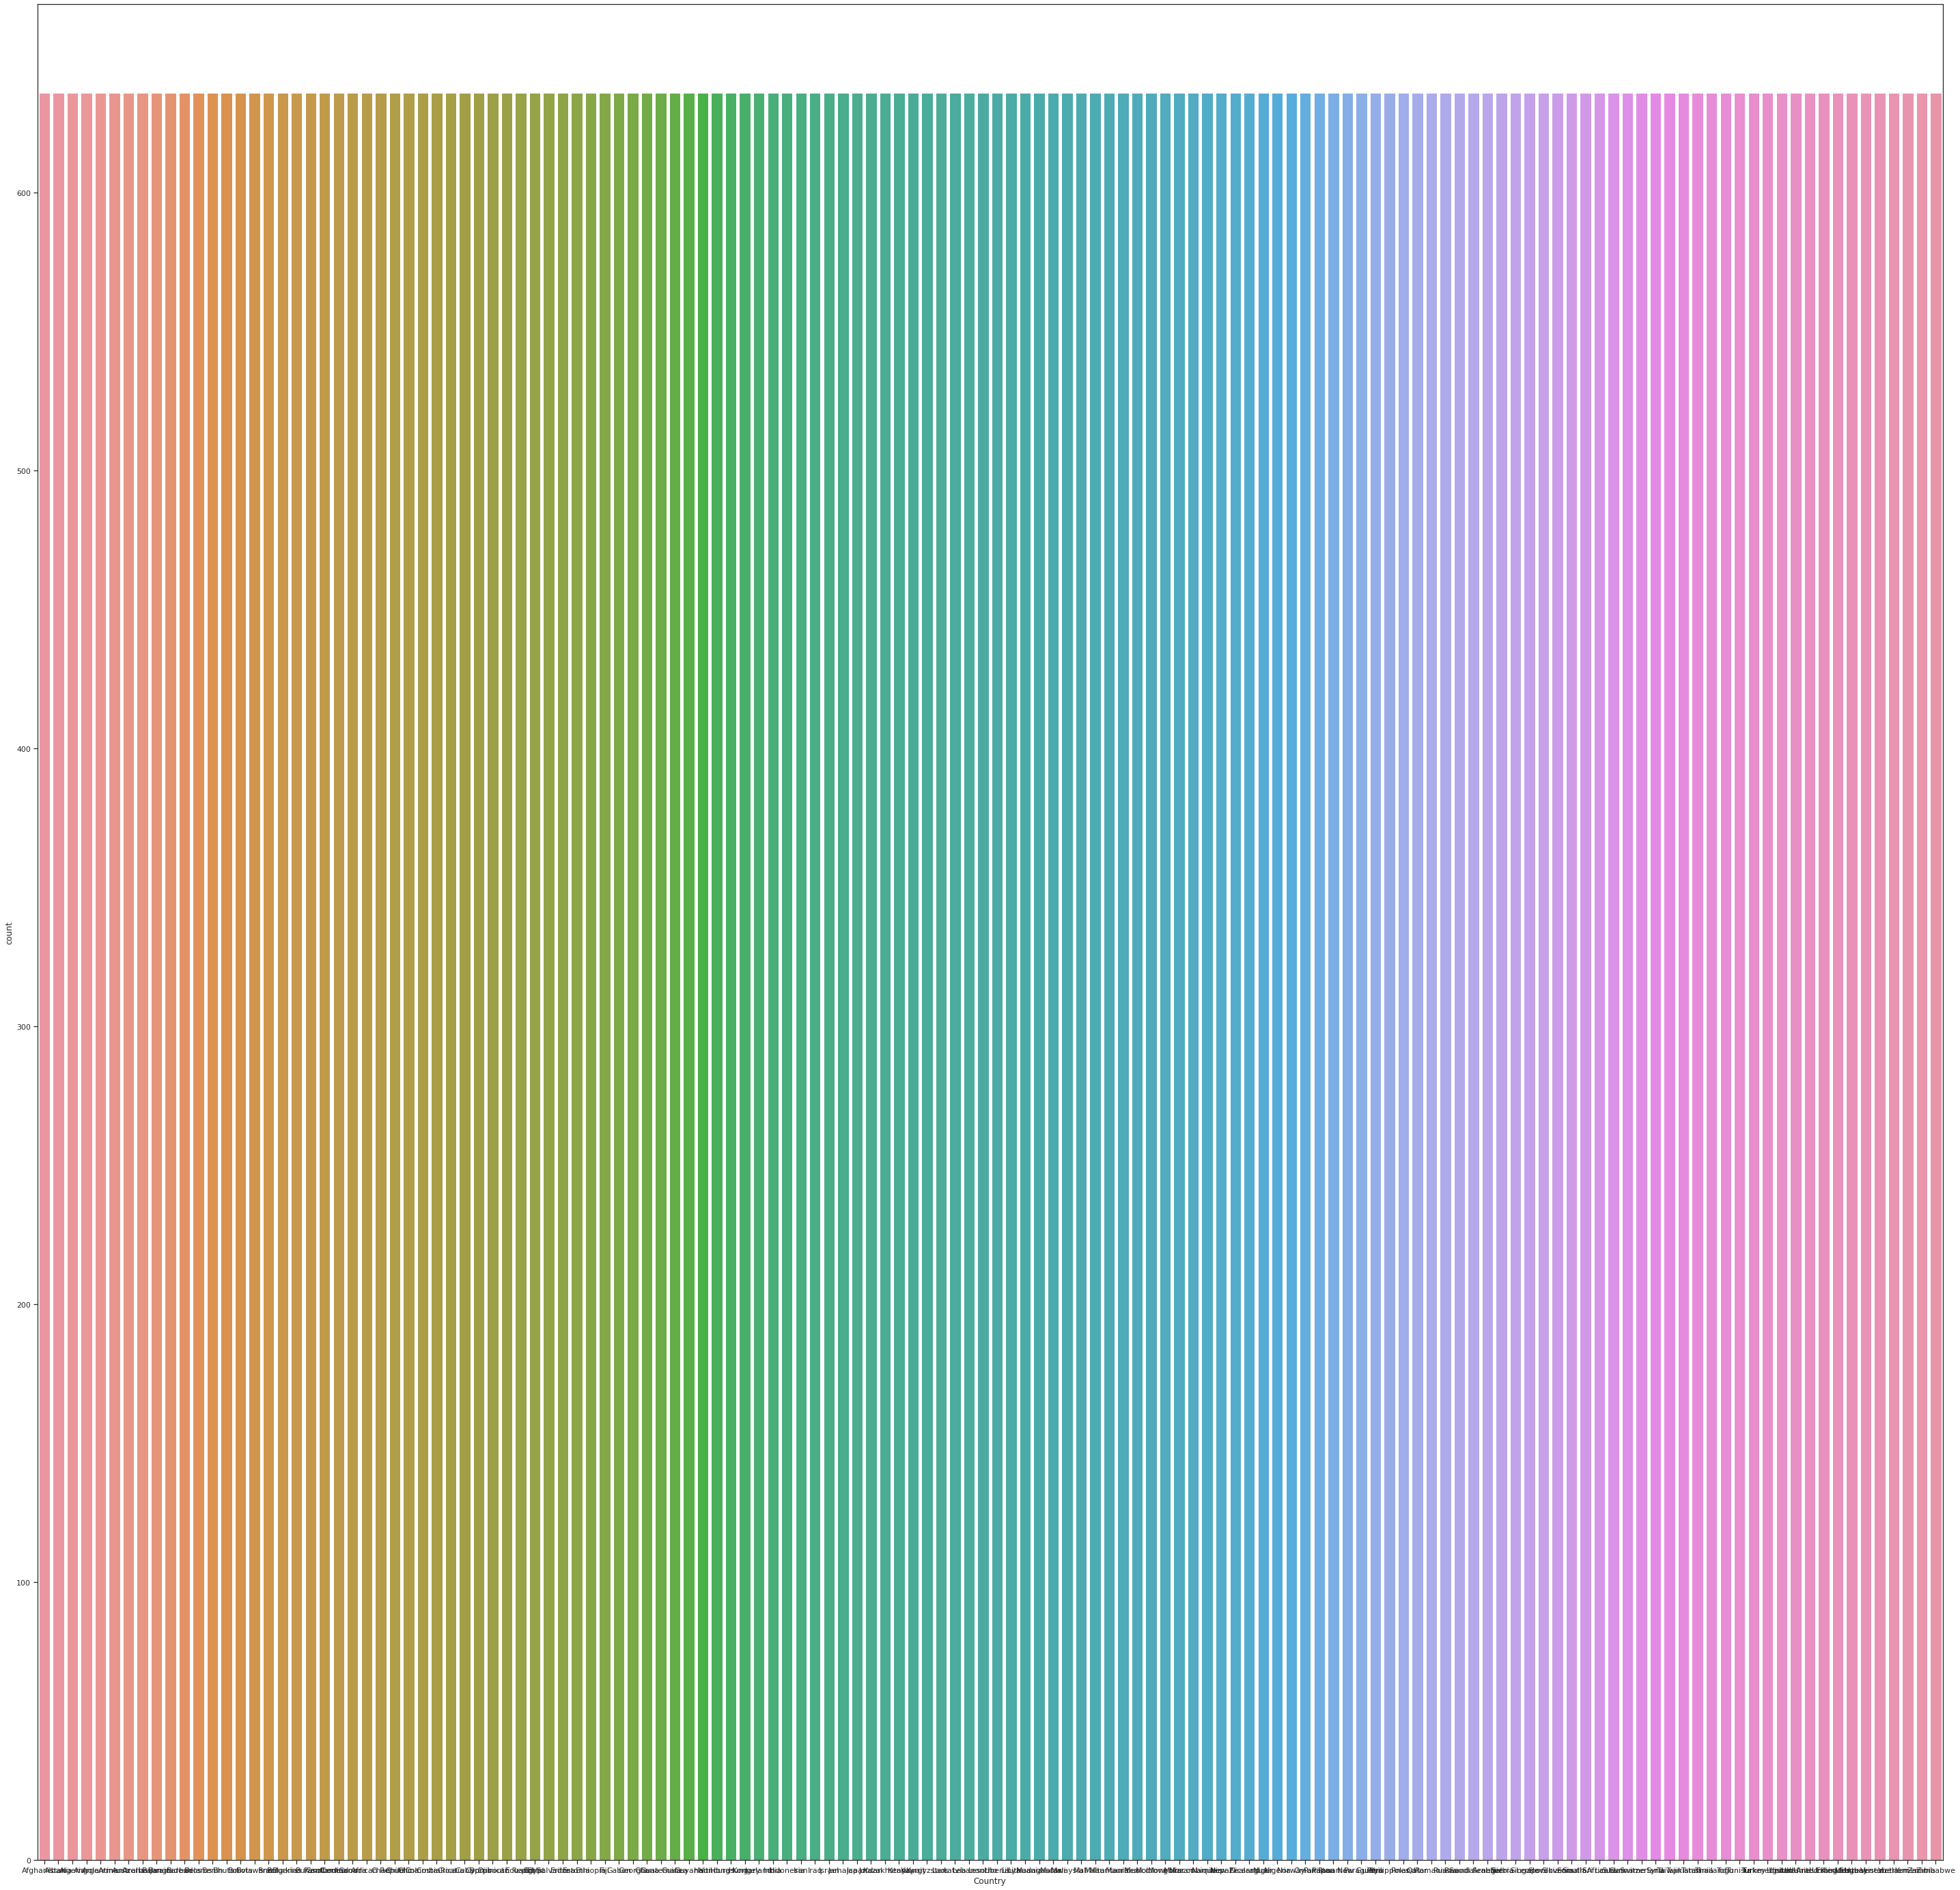

In [ ]:
sns.countplot(x='Country', data=mod_weather)

In [ ]:
canada = reduced_recent_weather[(reduced_recent_weather['Country'] == 'Canada')]
canada

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1960-01-01,-22.140,0.250,Canada,1960
1960-02-01,-18.113,0.242,Canada,1960
1960-03-01,-18.117,0.212,Canada,1960
1960-04-01,-6.975,0.241,Canada,1960
1960-05-01,3.733,0.276,Canada,1960
...,...,...,...,...
2012-08-01,13.045,0.245,Canada,2012
2012-09-01,7.907,0.237,Canada,2012
2012-10-01,-1.814,0.336,Canada,2012


In [ ]:
brazil = reduced_recent_weather[(reduced_recent_weather['Country'] == 'Brazil')]
brazil

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1960-01-01,25.515,0.321,Brazil,1960
1960-02-01,25.440,0.243,Brazil,1960
1960-03-01,25.284,0.282,Brazil,1960
1960-04-01,24.488,0.362,Brazil,1960
1960-05-01,23.393,0.420,Brazil,1960
...,...,...,...,...
2012-08-01,25.349,0.276,Brazil,2012
2012-09-01,26.728,0.197,Brazil,2012
2012-10-01,27.120,0.314,Brazil,2012


In [ ]:
serbia = reduced_recent_weather[(reduced_recent_weather['Country'] == 'Serbia')]
serbia

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1960-01-01,-1.707,0.331,Serbia,1960
1960-02-01,1.163,0.717,Serbia,1960
1960-03-01,5.469,0.250,Serbia,1960
1960-04-01,9.886,0.285,Serbia,1960
1960-05-01,14.248,0.415,Serbia,1960
...,...,...,...,...
2012-08-01,23.453,0.431,Serbia,2012
2012-09-01,19.029,0.533,Serbia,2012
2012-10-01,12.507,0.330,Serbia,2012


In [ ]:
us = reduced_recent_weather[(reduced_recent_weather['Country'] == 'United States')]
us

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
Date,,,,
1960-01-01,-3.791,0.161,United States,1960
1960-02-01,-2.488,0.223,United States,1960
1960-03-01,-0.038,0.103,United States,1960
1960-04-01,8.383,0.169,United States,1960
1960-05-01,13.757,0.287,United States,1960
...,...,...,...,...
2012-08-01,21.422,0.251,United States,2012
2012-09-01,17.036,0.185,United States,2012
2012-10-01,9.688,0.225,United States,2012


In [ ]:
new_weather = mod_weather.groupby(['Year','Country']).mean()
new_weather

AverageTemperature  AverageTemperatureUncertainty
Year Country                                                       
1960 Afghanistan           13.985417                       0.441833
     Albania               13.335083                       0.318750
     Algeria               23.504083                       0.452083
     Angola                21.927083                       0.302417
     Argentina             14.993667                       0.240250
...                              ...                            ...
2012 Venezuela             25.688583                       0.401417
     Vietnam               24.704333                       0.418083
     Yemen                 27.445000                       0.679250
     Zambia                21.697750                       0.586583
     Zimbabwe              21.521333                       0.538500

[7208 rows x 2 columns]

In [ ]:
new_weather.index

MultiIndex([(1960,          'Afghanistan'),
            (1960,              'Albania'),
            (1960,              'Algeria'),
            (1960,               'Angola'),
            (1960,            'Argentina'),
            (1960,              'Armenia'),
            (1960,            'Australia'),
            (1960,           'Azerbaijan'),
            (1960,              'Bahrain'),
            (1960,           'Bangladesh'),
            ...
            (2012, 'United Arab Emirates'),
            (2012,       'United Kingdom'),
            (2012,        'United States'),
            (2012,              'Uruguay'),
            (2012,           'Uzbekistan'),
            (2012,            'Venezuela'),
            (2012,              'Vietnam'),
            (2012,                'Yemen'),
            (2012,               'Zambia'),
            (2012,             'Zimbabwe')],
           names=['Year', 'Country'], length=7208)

### New Section

In [ ]:
reset_new_weather = new_weather.reset_index()
reset_new_weather.rename(columns={'AverageTemperature':'Yearly Average Temperature', 'AverageTemperatureUncertainty':'Yearly Average Temperature Uncertainty'}, inplace=True)

In [ ]:
reset_new_weather

,Year,Country,Yearly Average Temperature,Yearly Average Temperature Uncertainty
0,1960,Afghanistan,13.985417,0.441833
1,1960,Albania,13.335083,0.318750
2,1960,Algeria,23.504083,0.452083
3,1960,Angola,21.927083,0.302417
4,1960,Argentina,14.993667,0.240250
...,...,...,...,...
7203,2012,Venezuela,25.688583,0.401417
7204,2012,Vietnam,24.704333,0.418083
7205,2012,Yemen,27.445000,0.679250
7206,2012,Zambia,21.697750,0.586583


## Saving the modified data into another csv file

In [ ]:
reset_new_weather.to_csv('Berkley_Weather_Edit2.csv', index = False)

In [ ]:
df = pd.read_csv('Berkley_Weather_Edit2.csv')

In [ ]:
df = df.rename_axis(index = 'Instances')

In [ ]:
df

,Year,Country,Yearly Average Temperature,Yearly Average Temperature Uncertainty
Instances,,,,
0,1960,Afghanistan,13.985417,0.441833
1,1960,Albania,13.335083,0.318750
2,1960,Algeria,23.504083,0.452083
3,1960,Angola,21.927083,0.302417
4,1960,Argentina,14.993667,0.240250
...,...,...,...,...
7203,2012,Venezuela,25.688583,0.401417
7204,2012,Vietnam,24.704333,0.418083
7205,2012,Yemen,27.445000,0.679250


In [ ]:
df.to_csv('Berkley_Weather_Final.csv', index = True)

In [2]:
final = pd.read_csv('Berkley_Weather_Final.csv')

In [3]:
final

,Instances,Year,Country,Yearly Average Temperature,Yearly Average Temperature Uncertainty
0,0,1960,Afghanistan,13.985417,0.441833
1,1,1960,Albania,13.335083,0.318750
2,2,1960,Algeria,23.504083,0.452083
3,3,1960,Angola,21.927083,0.302417
4,4,1960,Argentina,14.993667,0.240250
...,...,...,...,...,...
8687,8687,2012,Venezuela,25.688583,0.401417
8688,8688,2012,Vietnam,24.704333,0.418083
8689,8689,2012,Yemen,27.445000,0.679250
8690,8690,2012,Zambia,21.697750,0.586583


In [6]:
print(final['Yearly Average Temperature Uncertainty'].max())

1.542166666666667


# Berkley Weather Yearly Average Temperature by Country Visualizations

## Initializing variables from the reduced dataset

In [ ]:
years = df['Year']
yearly_average_temp = df['Yearly Average Temperature']
yearly_average_temp_uncertainty = df['Yearly Average Temperature Uncertainty']
countries = df['Country']

In [ ]:
sns.set()
sns.scatterplot(x = years, y = yearly_average_temp, hue = countries)

In [ ]:
sns.stripplot(x='Year', y='Yearly')